In [29]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shashwatwork/web-page-phishing-detection-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/shashwatwork/web-page-phishing-detection-dataset/versions/2


In [30]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [31]:
# Carregar o dataset
df = pd.read_csv('/root/.cache/kagglehub/datasets/shashwatwork/web-page-phishing-detection-dataset/versions/2/dataset_phishing.csv', encoding='latin1')

# Selecionar apenas as colunas relevantes
df = df[['url', 'status']]
df = df.dropna()  # Remover valores nulos, se existirem

# Mapear rótulos para valores binários
df['status'] = df['status'].map({'legitimate': 0, 'phishing': 1})  # Ajustar mapeamento conforme necessário


In [32]:
# Verificar as primeiras linhas do dataset
df.head()


,url,status
0,http://www.crestonwood.com/router.php,0
1,http://shadetreetechnology.com/V4/validation/a...,1
2,https://support-appleld.com.secureupdate.duila...,1
3,http://rgipt.ac.in,0
4,http://www.iracing.com/tracks/gateway-motorspo...,0


In [33]:
# Verificar os tipos de dados e valores nulos
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   url     11430 non-null  object
 1   status  11430 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 178.7+ KB


In [34]:
# Contagem de rótulos (legítimos vs. phishing)
df['status'].value_counts()


,count
status,
0,5715
1,5715


<ipython-input-35-d82d05cae41f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='status', data=df, palette='Set2')


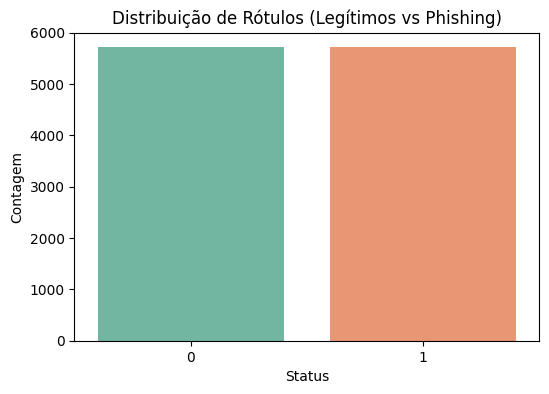

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizar a distribuição de rótulos
plt.figure(figsize=(6,4))
sns.countplot(x='status', data=df, palette='Set2')
plt.title('Distribuição de Rótulos (Legítimos vs Phishing)')
plt.xlabel('Status')
plt.ylabel('Contagem')
plt.show()


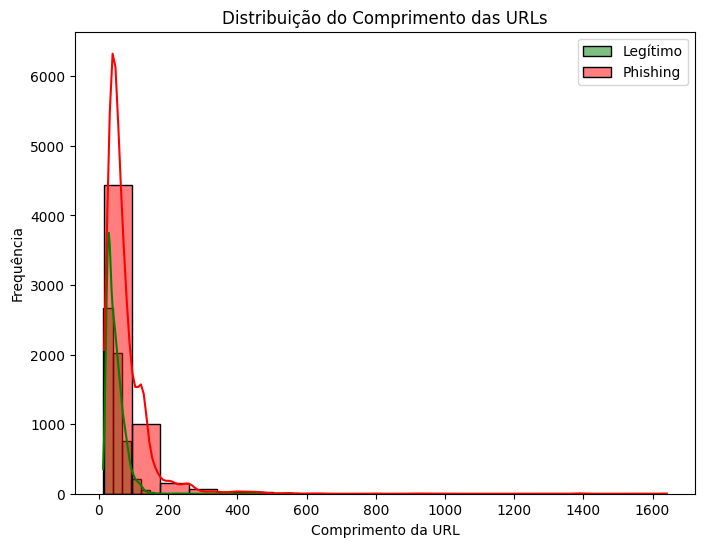

In [ ]:
# Adicionar uma nova coluna para o comprimento das URLs
df['url_length'] = df['url'].apply(len)

# Visualizar a distribuição do comprimento das URLs
plt.figure(figsize=(8,6))
sns.histplot(df[df['status'] == 0]['url_length'], kde=True, color='green', label='Legítimo', bins=20)
sns.histplot(df[df['status'] == 1]['url_length'], kde=True, color='red', label='Phishing', bins=20)
plt.title('Distribuição do Comprimento das URLs')
plt.xlabel('Comprimento da URL')
plt.ylabel('Frequência')
plt.legend()
plt.show()
